In [1]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('titanic-passengers.csv',sep = ';')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [2]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,True,False
888,False,False,False,False,False,False,False,False,False,False,True,False
889,False,False,False,False,False,True,False,False,False,False,True,False


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [4]:
data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.describe(include=['O'])

,Survived,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,204,889
unique,2,891,2,681,147,3
top,No,"Dick, Mrs. Albert Adrian (Vera Gillespie)",male,347082,B96 B98,S
freq,549,1,577,7,4,644


In [6]:
data.drop('Cabin', axis=1, inplace=True)

In [7]:
data['Sex'] = data['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,S


In [8]:
guess_ages = np.zeros((2,3))
for i in range(0, 2):
    for j in range(0, 3):
        guess_df = data[(data['Sex'] == i) & (data['Pclass'] == j+1)]['Age'].dropna()

        age_guess = guess_df.median()
        guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            data.loc[ (data.Age.isnull()) & (data.Sex == i) & (data.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    data['Age'] = data['Age'].astype(int)

data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",0,28,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",0,25,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",0,20,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",0,31,1,0,F.C. 12750,52.0000,S
...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14,1,0,237736,30.0708,C
887,61,No,3,"Sirayanian, Mr. Orsen",0,22,0,0,2669,7.2292,C
888,535,No,3,"Cacic, Miss. Marija",1,30,0,0,315084,8.6625,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",0,25,0,0,349215,7.8958,S


In [9]:
data['Survived'] = data['Survived'].map( {'Yes': 1, 'No': 0} ).astype(int)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28,0,0,248740,13.0000,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25,0,0,348123,7.6500,S
2,641,0,3,"Jensen, Mr. Hans Peder",0,20,0,0,350050,7.8542,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29,0,4,349909,21.0750,S
4,672,0,1,"Davidson, Mr. Thornton",0,31,1,0,F.C. 12750,52.0000,S
...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14,1,0,237736,30.0708,C
887,61,0,3,"Sirayanian, Mr. Orsen",0,22,0,0,2669,7.2292,C
888,535,0,3,"Cacic, Miss. Marija",1,30,0,0,315084,8.6625,S
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",0,25,0,0,349215,7.8958,S


In [10]:
one_hot = pd.get_dummies(data['Embarked'])
data = data.drop('Embarked', axis = 1) 
newdata = data.join(one_hot)
newdata

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,C,Q,S
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28,0,0,248740,13.0000,0,0,1
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25,0,0,348123,7.6500,0,0,1
2,641,0,3,"Jensen, Mr. Hans Peder",0,20,0,0,350050,7.8542,0,0,1
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29,0,4,349909,21.0750,0,0,1
4,672,0,1,"Davidson, Mr. Thornton",0,31,1,0,F.C. 12750,52.0000,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14,1,0,237736,30.0708,1,0,0
887,61,0,3,"Sirayanian, Mr. Orsen",0,22,0,0,2669,7.2292,1,0,0
888,535,0,3,"Cacic, Miss. Marija",1,30,0,0,315084,8.6625,0,0,1
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",0,25,0,0,349215,7.8958,0,0,1


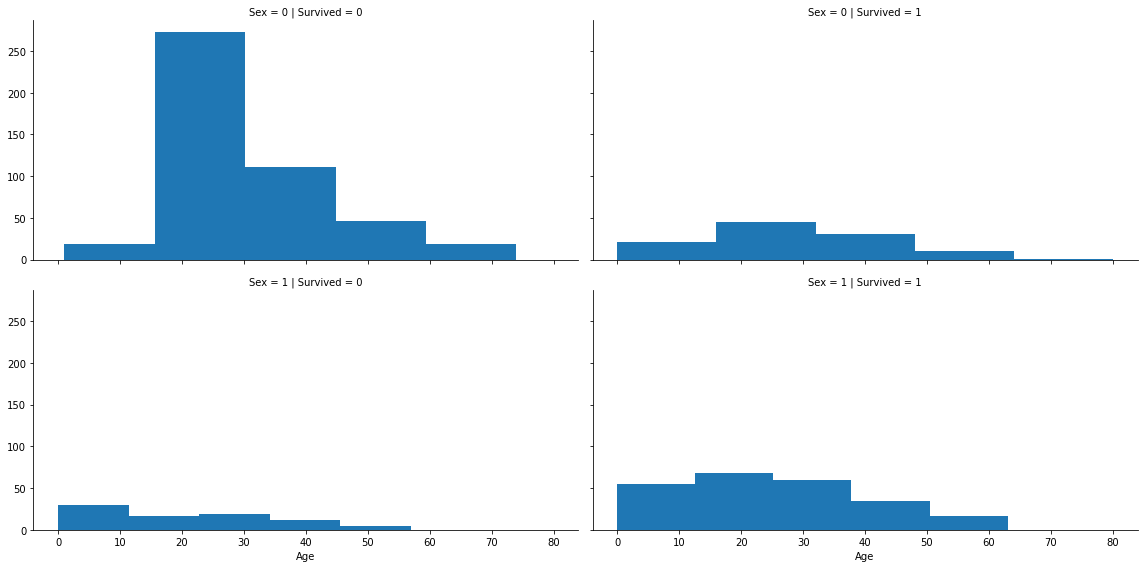

In [11]:
g = sns.FacetGrid(newdata, col='Survived',row="Sex", height=4, aspect=2)
g.map(plt.hist,'Age', bins=5)

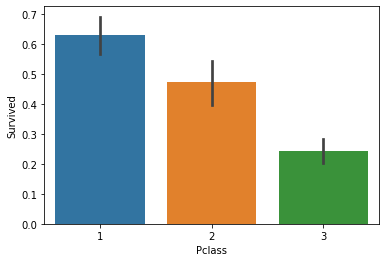

In [12]:
ax = sns.barplot(x="Pclass", y="Survived", data=newdata)

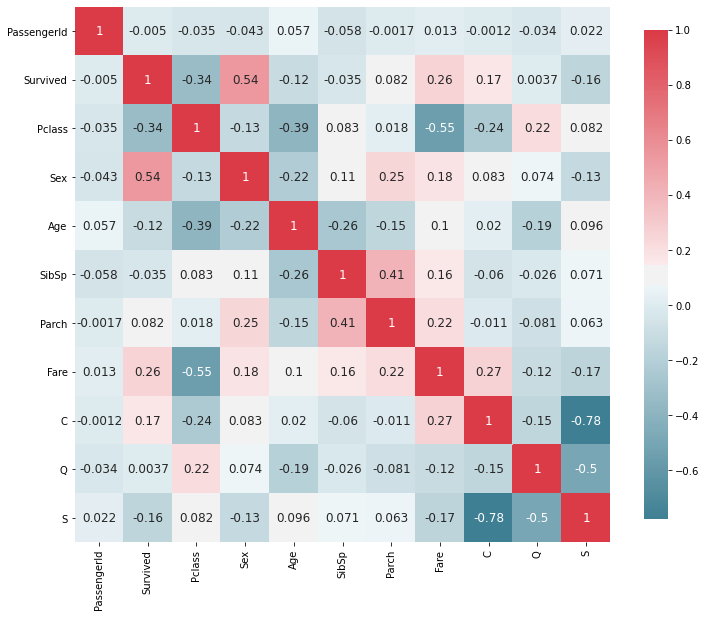

In [13]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map(newdata)
#the function above measure how much a columun depend on the other one

In [14]:
newdata.groupby(by=["Pclass","Survived"]).mean()

PassengerId       Sex        Age     SibSp     Parch  \
Pclass Survived                                                         
1      0          410.300000  0.037500  42.950000  0.287500  0.300000   
       1          491.772059  0.669118  33.191176  0.492647  0.389706   
2      0          452.123711  0.061856  33.278351  0.319588  0.144330   
       1          439.080460  0.804598  25.367816  0.494253  0.643678   
3      0          453.580645  0.193548  24.967742  0.672043  0.384409   
       1          394.058824  0.605042  16.621849  0.436975  0.420168   

                      Fare         C         Q         S  
Pclass Survived                                           
1      0         64.684008  0.325000  0.012500  0.662500  
       1         95.608029  0.433824  0.007353  0.544118  
2      0         19.412328  0.082474  0.010309  0.907216  
       1         22.055700  0.103448  0.022989  0.873563  
3      0         13.669364  0.110215  0.120968  0.768817  
       1         13.694887  0.210084  0.226891  0.563025

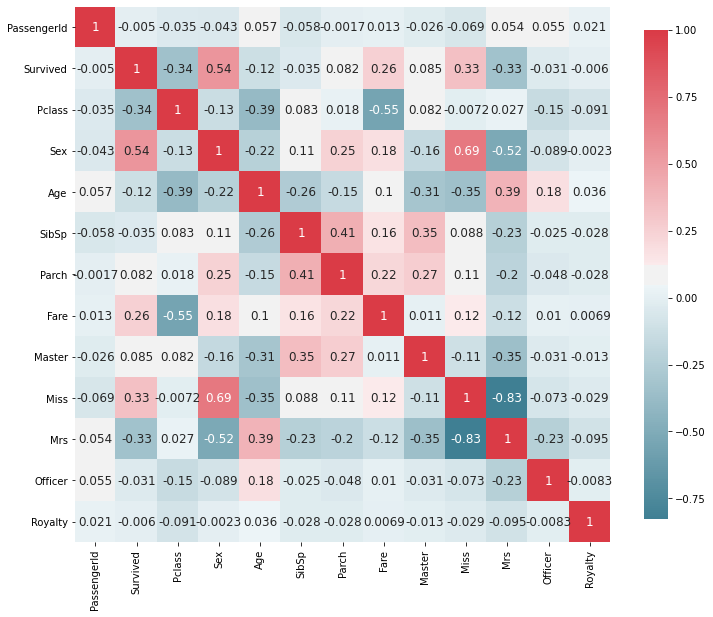

In [19]:
Title_Dictionary = {
"Capt":       "Officer",
"Col":        "Officer",
"Major":      "Officer",
"Dr":         "Officer",
"Rev":        "Officer",
"Jonkheer":   "Royalty",
"Don":        "Royalty",
"Sir" :       "Royalty",
"Lady" :      "Royalty",
"the Countess": "Royalty",
"Dona":       "Royalty",
"Mme":        "Miss",
"Mlle":       "Miss",
"Miss" :      "Miss",
"Ms":         "Mrs",
"Mr" :        "Mrs",
"Mrs" :       "Mrs",
"Master" :    "Master"
}
for i in Title_Dictionary:
    key = newdata["Name"].str.find(i)
    rowIndex = key.index[key!=-1]
    newdata.loc[rowIndex, 'Title'] = Title_Dictionary[i]
one_hot = pd.get_dummies(newdata['Title'])
newdata = newdata.drop('Title', axis = 1) 
newdata = data.join(one_hot)
plot_correlation_map(newdata)

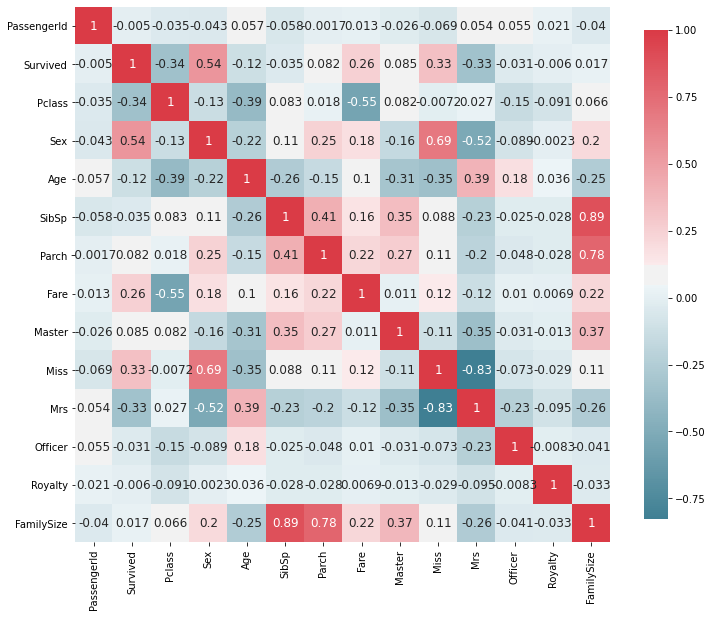

In [23]:
newdata['FamilySize'] = newdata['SibSp'] + newdata['Parch']+ 1
plot_correlation_map(newdata)